# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rendie Abdi Saputra
- **Email:** xiaomimantapjiwa76@gmail.com
- **ID Dicoding:** rendie_ryu

## Menentukan Pertanyaan Bisnis



```
# This is formatted as code
```

- Pada musim apakah penyewaan sepeda paling sedikit dan paling banyak?
- Bagaimana perbedaan jumlah penyewaan sepeda pada hari biasa(weekday) dengan hari libur/akhir pekan(holiday)?
- Bagaimana performa penyewaan dalam beberapa tahun terakhir?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Load table day.csv

In [2]:
day = pd.read_csv("day.csv", delimiter=",")
day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Load tabel hour.csv

In [3]:
hour = pd.read_csv("hour.csv", delimiter=",")
hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- day.csv :

Dataset "day.csv" mencakup 731 entri yang merekam penggunaan sepeda setiap hari, dengan kolom-kolom yang mencakup tanggal, musim, tahun, bulan, hari libur, hari kerja, kondisi cuaca, suhu, kelembapan, dan kecepatan angin. Selain itu, dataset ini juga mencatat jumlah pengguna sepeda kasual (pengguna yang tidak terdaftar), pengguna terdaftar, serta total peminjaman harian.

- hour.csv:

Dataset "hour.csv" mencatat 17.379 entri yang berisi data peminjaman sepeda setiap jam. Dataset ini memiliki struktur kolom yang hampir sama dengan dataset harian, tetapi menambahkan kolom jam (hr) untuk menangkap detail peminjaman sepeda pada tingkat waktu yang lebih spesifik.

### Assessing Data

#### **day.csv**

1. Cek tipe data day apakah sudah benar atau belum

In [4]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terdapat kesalahan pada tipe data dtday(object), harusnya dtday(datetime)

2. Cek data yang duplikat

In [5]:
print("Jumlah data duplikat: ", day.duplicated().sum())

Jumlah data duplikat:  0


Tidak ada data yang duplikat

3. Cek _missing value_

In [6]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada data yang hilang(_missing value_)

4. Cek _outlier_ data (_noise_)

In [ ]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak ada _outlier_ data (_noise_)

#### **hour.csv**

1. Cek tipe data day apakah sudah benar atau belum

In [8]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Terdapat kesalahan pada tipe data dtday(object), harusnya dtday(datetime)

2. Cek data yang duplikat

In [9]:
print("Jumlah data duplikat: ", hour.duplicated().sum())

Jumlah data duplikat:  0


Tidak ada data yang duplikat

3. Cek _missing value_

In [10]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

4. Cek _outlier_ data (_noise_)

In [11]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak ada _outlier_ data (_noise_)

**Insight:**

Dari hasil _Assesing data_, didapatkan identifikasi beberapa masalah pada data yang dikumpulkan sebagai berikut:

| |**Tipe Data**|**Data Duplikat**|**_Missing Value_**|**_Outlier_**|
| --- | --- | --- | --- | --- |
| **day** | Tipe data dtday(object) salah,  harusnya dtday(datetime) | - | - | - |
| **hour** | Tipe data dtday(object) salah,  harusnya dtday(datetime) | - | - | - |

Dari tabel di atas, dapat disimpulkan bahwa kedua data memiliki masalah yang sama. Yaitu kesalahan tipe data

### Cleaning Data

Untuk melakukan cleaning data, kita dapat membuat task yang akan dikerjakan terlebih dahulu. Mulai dari yang berhubungan dengan _Assesing_ data hingga menyeleksi beberapa data untuk digunakan
|**No**|***Task***|
| --- | --- |
|1|Menghapus tabel '_hour_', karena isi data sama dan tidak dibutuhkan data jam('hr')|
|2|Menghapus kolom workingday dan instant, karena kolom kolom tersebut tidak dibutuhkan dalam analisis data |
|3|Mengubah label kolom seperti 'dtday', 'yr', 'mnth', 'weathersit', dan 'cnt' menjadi 'datday', 'year', 'month', 'weather', dan 'count'. |
|4|Memperbaiki tipe data dateday(object) menjadi dateday(datetime) |
|5|Mengubah beberapa tipe data menjadi category seperti 'season', 'month', 'holiday', 'weekday', dan 'weather' |
|6|Mengkonversi isi kolom dengan data yang mudah dipahami |
|7|Membuat kolom baru bernama 'category_days' yang menunjukan isi kolom tersebut weekdays atau holiday |

1. Menghapus tabel '_hour_'

In [12]:
del hour

2. Menghapus kolom workingday dan instant

In [13]:
drop_col = ['instant', 'workingday']

for i in day.columns:
  if i in drop_col:
    day.drop(labels=i, axis=1, inplace=True)

In [14]:
day.rename(columns={'dteday': 'dateday', 'yr': 'year','mnth': 'month', 'weathersit': 'weather','hum': 'humidity' ,'cnt': 'counts'}, inplace=True)
day.head()

,dateday,season,year,month,holiday,weekday,weather,temp,atemp,humidity,windspeed,casual,registered,counts
0,2011-01-01,1,0,1,0,6,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
day['dateday'] = pd.to_datetime(day.dateday)

In [ ]:
columns = ['season', 'month', 'holiday', 'weekday', 'weather']
 
for column in columns:
    day[column] =  day[column].astype("category")

day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dateday     731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   year        731 non-null    int64         
 3   month       731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   weather     731 non-null    category      
 7   temp        731 non-null    float64       
 8   atemp       731 non-null    float64       
 9   humidity    731 non-null    float64       
 10  windspeed   731 non-null    float64       
 11  casual      731 non-null    int64         
 12  registered  731 non-null    int64         
 13  counts      731 non-null    int64         
dtypes: category(5), datetime64[ns](1), float64(4), int64(4)
memory usage: 56.3 KB


In [17]:
day['month'] = day['month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 
                                  4: 'Apr', 5: 'May', 6: 'Jun', 
                                  7: 'Jul', 8: 'Aug', 9: 'Sep', 
                                  10: 'Oct', 11: 'Nov', 12: 'Dec'})

day['season'] = day['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

day['weekday'] = day['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

day['weather'] = day['weather'].map({1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Rain', 4: 'Heavy Rain'})

day['year'] = day['year'].map({0: 2011, 1: 2012})

In [18]:
def get_category_days(one_of_week, holiday):
    if one_of_week in ["Saturday", "Sunday"] or holiday == 1:
        return "holiday"
    return "weekdays"

day['day_category'] = day.apply(lambda x: get_category_days(x['weekday'], x['holiday']), axis=1).astype('category')

day.head()

,dateday,season,year,month,holiday,weekday,weather,temp,atemp,humidity,windspeed,casual,registered,counts,day_category
0,2011-01-01,Spring,2011,Jan,0,Saturday,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,holiday
1,2011-01-02,Spring,2011,Jan,0,Sunday,Mist + Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801,holiday
2,2011-01-03,Spring,2011,Jan,0,Monday,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349,weekdays
3,2011-01-04,Spring,2011,Jan,0,Tuesday,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562,weekdays
4,2011-01-05,Spring,2011,Jan,0,Wednesday,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600,weekdays


In [19]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       731 non-null    datetime64[ns]
 1   season        731 non-null    category      
 2   year          731 non-null    int64         
 3   month         731 non-null    category      
 4   holiday       731 non-null    category      
 5   weekday       731 non-null    category      
 6   weather       731 non-null    category      
 7   temp          731 non-null    float64       
 8   atemp         731 non-null    float64       
 9   humidity      731 non-null    float64       
 10  windspeed     731 non-null    float64       
 11  casual        731 non-null    int64         
 12  registered    731 non-null    int64         
 13  counts        731 non-null    int64         
 14  day_category  731 non-null    category      
dtypes: category(6), datetime64[ns](1), float

**Insight:**

|**No**|***Task***|**Status**|
| --- | --- | --- |
|1|Menghapus tabel '_hour_', karena isi data sama dan tidak dibutuhkan data jam('hr')|_Done_|
|2|Menghapus kolom workingday dan instant, karena kolom kolom tersebut tidak dibutuhkan dalam analisis data |_Done_|
|3|Mengubah label kolom seperti 'dtday', 'yr', 'mnth', 'weathersit', dan 'cnt' menjadi 'datday', 'year', 'month', 'weather', dan 'count'. |_Done_|
|4|Memperbaiki tipe data dateday(object) menjadi dateday(datetime) |_Done_|
|5|Mengubah beberapa tipe data menjadi category seperti 'season', 'month', 'holiday', 'weekday', dan 'weather' |_Done_|
|6|Mengkonversi isi kolom dengan data yang mudah dipahami |_Done_|
|7|Membuat kolom baru bernama 'category_days' yang menunjukan isi kolom tersebut weekdays atau holiday |_Done_|

Dataset telah disederhanakan dengan menghapus tabel dan kolom yang tidak relevan, mengganti nama kolom agar lebih deskriptif, dan mengubah beberapa tipe data untuk efisiensi. Isi kolom juga disederhanakan agar lebih mudah dipahami, serta kolom 'category_days' ditambahkan untuk memudahkan analisis antara weekdays dan holiday.

## Exploratory Data Analysis (EDA)

### Explore Data day.csv

Explore data harus berhubungan dengan pertanyaan awal yang sudah dibuat, berikut list pertanyaannya:

|**Question**|**Task**|
| --- | --- |
|Pada musim apakah penyewaan sepeda paling sedikit dan paling banyak? | Menampilkan data musim dan jumlah penyewaan sepeda dalam bentuk tabel|
|Bagaimana perbedaan jumlah penyewaan sepeda pada hari biasa(weekday) dengan hari libur/akhir pekan(holiday)? | Menampilkan data rata-rata penyewaan sepeda saat _weekday_ dan _holiday_ dalam bentuk tabel|
|Bagaimana performa penyewaan dalam beberapa tahun terakhir? | Menampilkan data tahun dengan penyewaan sepeda dalam bentuk tabel|

1. Menampilkan data musim dan jumlah penyewaan

In [20]:
day.groupby(by="season", observed=False).counts.sum().sort_values(ascending=False).reset_index()

,season,counts
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


Dari data diatas, didapatkan hasil bahwa musim gugur memiliki jumlah penyewaan sepeda paling tinggi. Sedangkan msuim semi memiliki jumlah penyewaan sepeda paling rendah

2. Menampilkan data jumlah penyewaan sepeda saat weekday dan holiday

In [21]:
day.groupby(by="day_category", observed=False).counts.sum().sort_values(ascending=False).reset_index()

,day_category,counts
0,weekdays,2292410
1,holiday,1000269


Dari data diatas, diketahui bahwa jumlah penyewaan sepeda lebih banyak di hari biasa(weekday) dibandingkan dengan hari libur/akhir pekan(holiday)

3. Menampilkan data tahun dengan jumlah penyewaan pada tahun tersebut

In [22]:
day.groupby(by="year", observed=False).counts.sum().sort_values(ascending=False).reset_index()

,year,counts
0,2012,2049576
1,2011,1243103


Dari data diatas, diketahui bahwa jumlah penyewaan sepeda lebih banyak di tahun 2012 dibandingkan dengan tahun 2011

**Insight:**

Analisis musiman menunjukkan bahwa penyewaan sepeda paling tinggi terjadi pada musim panas dan paling rendah pada musim dingin. Kedua, perbandingan antara hari biasa dan hari libur menunjukkan bahwa rata-rata penyewaan sepeda lebih tinggi pada hari libur dan akhir pekan dibandingkan dengan hari kerja. Terakhir, analisis tren tahunan mengungkapkan peningkatan signifikan dalam jumlah penyewaan sepeda dari tahun 2011 ke 2012

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apakah penyewaan sepeda paling sedikit dan paling banyak?

C:\Users\lenov\AppData\Local\Temp\ipykernel_11028\4062280462.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


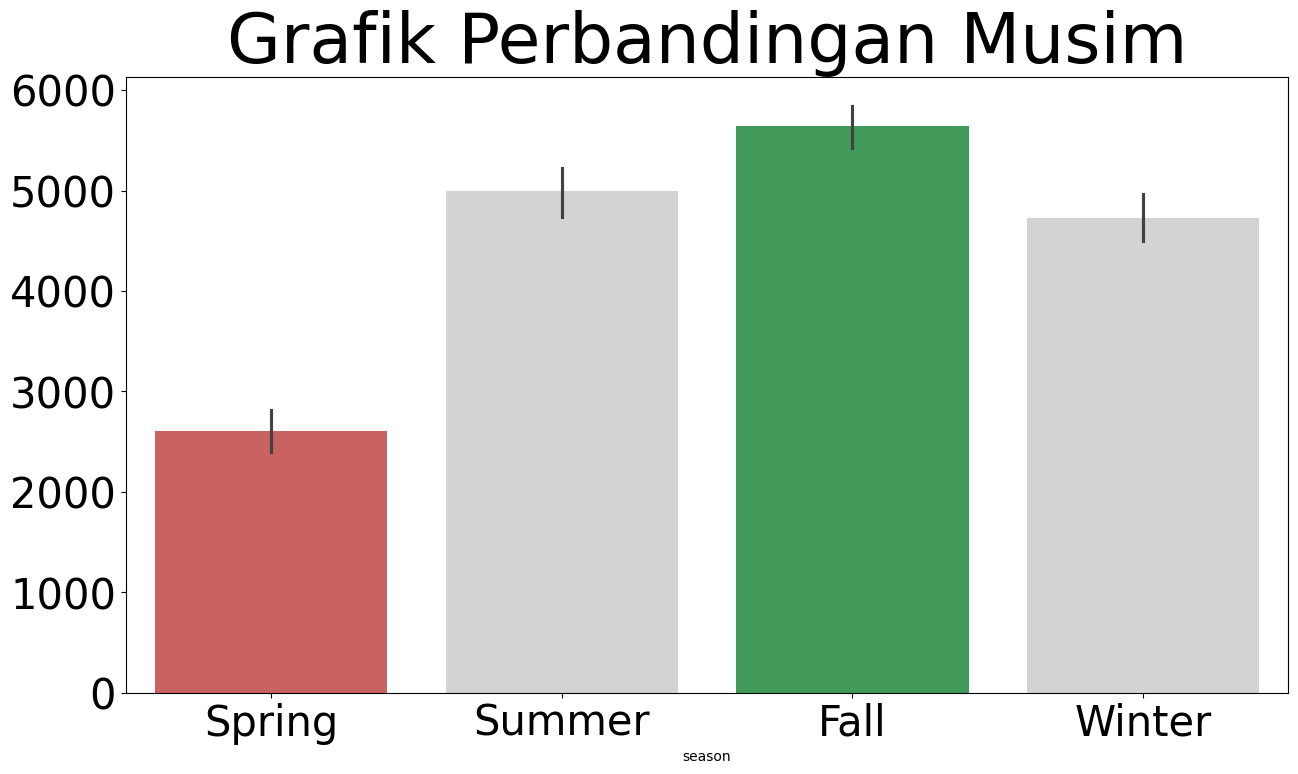

In [31]:
fig, ax = plt.subplots(figsize=(15, 8))
colors = ["#D9534F", "#D3D3D3", "#34A853", "#D3D3D3"]

sns.barplot(
        x="season",
        y="counts",
        data=day.sort_values(by="season", ascending=False),
        palette=colors,
        ax=ax
    )
ax.set_title("Grafik Perbandingan Musim", loc="center", fontsize=50)
ax.set_ylabel(None)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)

# menampilkan plot
plt.show()

Dari hasil diatas, dapat ditarik kesimpulan bahwa musim dengan penyewaan sepeda paling sedikit adalah musim semi(spring) dengan total 471.348 penyewaan, dan musim dengan penyewaan sepeda paling banyak adalah musim gugur(fall) dengan total 1.061.129 penyewaan

### Pertanyaan 2: Bagaimana perbedaan jumlah penyewaan sepeda pada hari biasa(weekday) dengan hari libur/akhir pekan(holiday)?

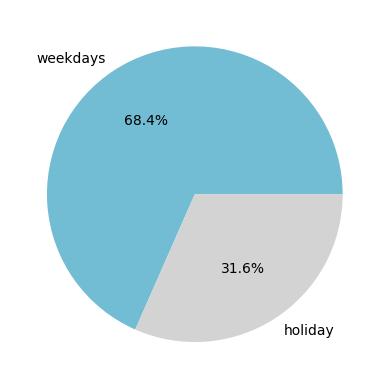

In [24]:
# Membuat data untuk pie plot
data = day['day_category'].value_counts()

# Membuat pie plot
plt.pie(data, labels=data.index, autopct='%1.1f%%', colors=["#72BCD4", "#D3D3D3"])

# Menampilkan pie plot
plt.show()

Sebagian besar penyewaan sepeda terjadi pada hari biasa (weekday), dengan persentase mencapai 68.4%. Sementara itu, penyewaan sepeda pada akhir pekan dan hari libur (holiday) hanya menyumbang 31.6% dari total penyewaan.

### Pertanyaan 3: Bagaimana performa penyewaan dalam beberapa tahun terakhir?

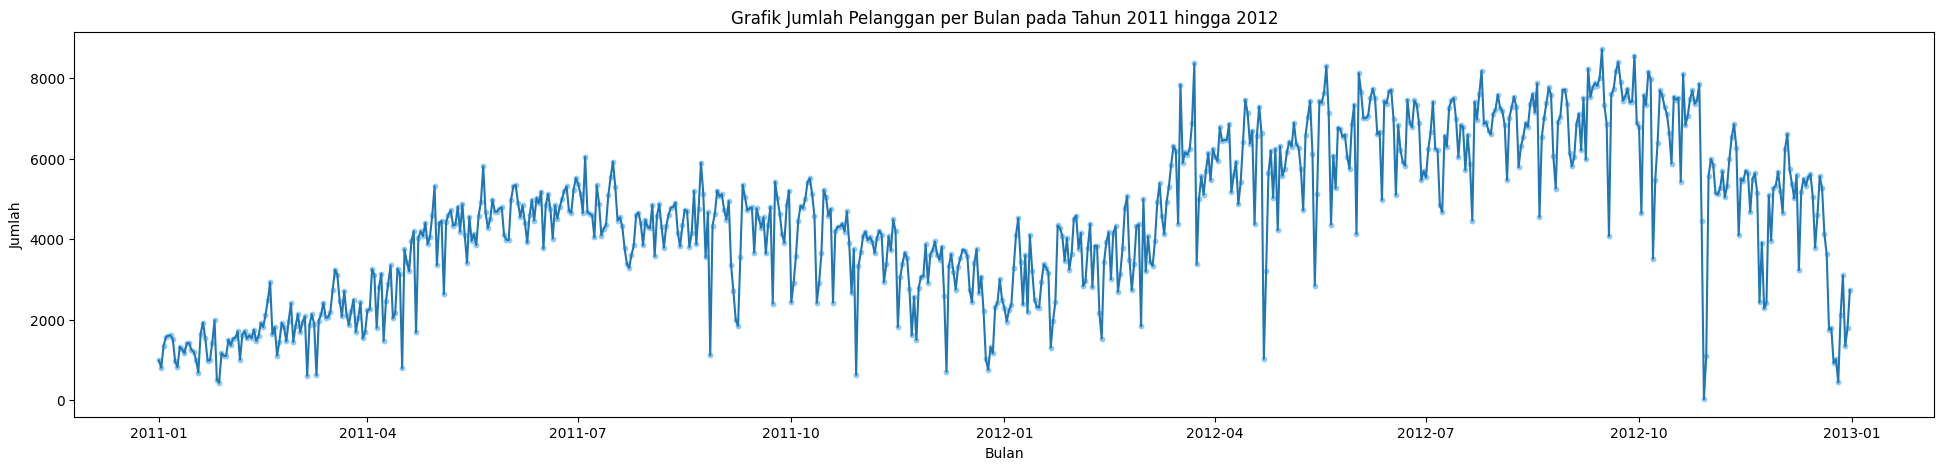

In [25]:
# mmebuat figure dengan ukuran (24, 5)
plt.figure(figsize=(24, 5))

# menghitung jumlah pelanggan maksimum per bulan
monthly_counts = day['counts'].groupby(day['dateday']).max()

# membuat scatter plot untuk jumlah pelanggan maksimum per bulan, dengan warna biru dan marker 'o'
plt.scatter(monthly_counts.index, monthly_counts.values, c="#90CAF9", s=10, marker='o')

# membuat line plot untuk jumlah pelanggan maksimum per bulan
plt.plot(monthly_counts.index, monthly_counts.values)

# penamaan untuk sumbu x
plt.xlabel('Bulan')

# penamaan untuk sumbu y
plt.ylabel('Jumlah')

# buat judul
plt.title('Grafik Jumlah Pelanggan per Bulan pada Tahun 2011 hingga 2012')

# menampilkan plot
plt.show()

Dari visualisasi data di atas, dapat disimpulkan bahwa jumlah order terbanyak terjadi pada bulan September 2012. Selain itu, disimpulkan juga adanya penurunan jumlah order yang cukup signifikan pada bulan November dan December 2012.

## Conclusion

Pertanyaan:

- Pertanyaan 1: Pada musim apakah penyewaan sepeda paling sedikit dan paling banyak?
- Pertanyaan 2: Bagaimana perbedaan jumlah penyewaan sepeda pada hari biasa(weekday) dengan hari libur/akhir pekan(holiday)?
- Pertanyaan 3: Bagaimana performa penyewaan dalam beberapa tahun terakhir?

Conclution pertanyaan 1: Dari hasil pada diagram, dapat ditarik kesimpulan bahwa musim dengan penyewaan sepeda paling sedikit adalah musim semi(spring) dengan total 471.348 penyewaan, dan musim dengan penyewaan sepeda paling banyak adalah musim gugur(fall) dengan total 1.061.129 penyewaan

Conclution pertanyaan 2: Sebagian besar penyewaan sepeda terjadi pada hari biasa (weekday), dengan persentase mencapai 68.4%. Sementara itu, penyewaan sepeda pada akhir pekan dan hari libur (holiday) hanya menyumbang 31.6% dari total penyewaan.

Conclution pertanyaan 3: Dari visualisasi data di atas, dapat disimpulkan bahwa jumlah order terbanyak terjadi pada bulan September 2012. Selain itu, disimpulkan juga adanya penurunan jumlah order yang cukup signifikan pada bulan November dan December 2012.

## Analisis Lanjutan (Opsional)

### Clustering

**Menampilkan total pengguna berdasarkan humidity:**

In [26]:
def classify_humidity(humidity):
    if humidity < 0.45:
        return "kering"
    elif humidity >= 0.45 and humidity < 0.65:
        return "Ideal"
    else:
        return "Lembab"

day["humidity_category"] = day["humidity"].apply(classify_humidity)

In [27]:
day.groupby(by="humidity_category").agg({
    "counts": ["count"]})

,counts
,count
humidity_category,
Ideal,334
Lembab,325
kering,72


Dapat disimpulkan bahwa kelompok pengguna lebih cenderung menyewa sepeda pada kelembapan yang ideal

**Menampilkan total pengguna berdasarkan cuaca:**

In [28]:
day.groupby(by="weather").counts.nunique().sort_values(ascending=False)

C:\Users\lenov\AppData\Local\Temp\ipykernel_11028\3980547545.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day.groupby(by="weather").counts.nunique().sort_values(ascending=False)


weather
Clear            451
Mist + Cloudy    243
Light Rain        21
Name: counts, dtype: int64

Dapat disimpulkan bahwa kelompok pengguna lebih cenderung menyewa sepeda pada hari-hari yang cerah